In [1]:
pip install ../../

Defaulting to user installation because normal site-packages is not writeable
Processing /home/mehdi/Straph
  Preparing metadata (setup.py) ... done
  Created wheel for straph: filename=straph-0.3-py3-none-any.whl size=128854 sha256=ea9e1b019fe5df37d52e25800f1aeb4cc613b6c1ba1a299144e871bab65a4cbd
  Stored in directory: /tmp/pip-ephem-wheel-cache-u1q576hb/wheels/ff/7b/fd/74f1a0c1e7fef46f5399a409f7bb3afe2da4ba468d26b5f5b7
Successfully built straph
  Attempting uninstall: straph
    Found existing installation: straph 0.3
    Uninstalling straph-0.3:
      Successfully uninstalled straph-0.3
Note: you may need to restart the kernel to use updated packages.


In [1]:
#sigmasv_links.sg
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,20)
import straph as sg
import straph.betweenness as bt
import straph.betweenness.volumes as vol
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "stream_ex_nodes.sg",
                      path_links=path_directory + "stream_ex_links.sg")
S.describe()

Nb of Nodes :  6
Nb of segmented nodes :  11.0
Nb of links :  20
Nb of segmented links :  34.0
Nb of event times :  17


<AxesSubplot:xlabel='t', ylabel='Nodes'>

findfont: Font family ['Garamond'] not found. Falling back to DejaVu Sans.


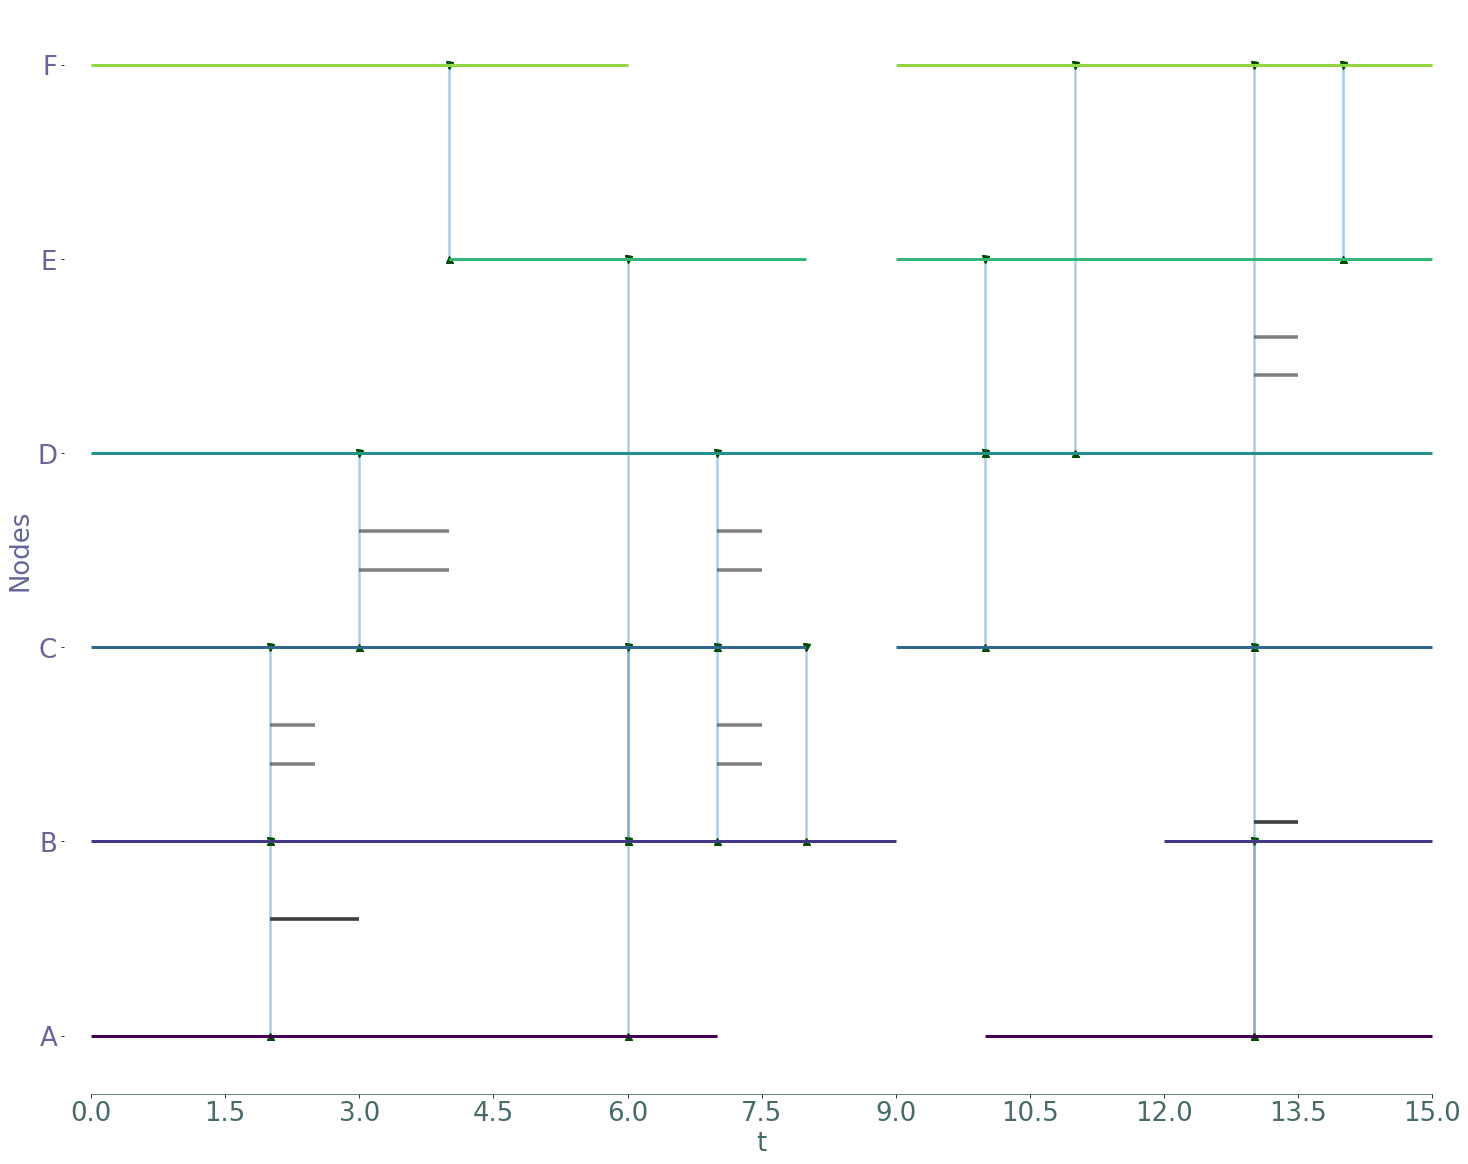

In [2]:
S.plot()

In [3]:
#for i in range(0,2*int(max(list(S.event_times())))):
#    S.add_point(i/2)
S.sg_to_streamfig("stream_example","eps")
nouveau = S.fragmented_stream_graph()

In [4]:
#nouveau.plot()
#plt.savefig("link_s_con.png",dpi=300,bbox_inches ='tight' )

In [5]:
events, events_reverse = bt.events_dic(nouveau)

In [6]:
link_ind = bt.link_index(nouveau)
neighbors, neighbors_inv = bt.neighbors_direct(nouveau)
unt = bt.until(nouveau, events, events_reverse)

In [7]:
node = 0

In [8]:
pre, cur_best = bt.dijkstra_directed(nouveau, node, events, events_reverse, neighbors, link_ind, neighbors_inv, unt)
cur_b_arr = bt. cur_best_to_array(nouveau, cur_best, events, events_reverse)

neighbors 0 1 {(2.0, (2.0, 2.0)), (13.0, (13.0, 13.0)), (3.0, (2.5, 3.0)), (6.0, (6.0, 6.0)), (2.5, (2.0, 2.5))}
st 0 2.0
st 0 2.5
st 0 2.5
st 0 3.0
st 0 6.0
st 0 13.0
neighbors 0 2 {(13.5, (13.0, 13.5)), (13.0, (13.0, 13.0))}
st 0 13.0
st 0 13.5
cur s a t  0 0 2.0 {0.0: (-inf, inf), 2.0: (-inf, inf), 2.5: (-inf, inf), 3.0: (-inf, inf), 4.0: (-inf, inf), 6.0: (-inf, inf), 7.0: (-inf, inf), 7.5: (-inf, inf), 8.0: (-inf, inf), 9.0: (-inf, inf), 10.0: (-inf, inf), 11.0: (-inf, inf), 12.0: (-inf, inf), 13.0: (-inf, inf), 13.5: (-inf, inf), 14.0: (-inf, inf), 15.0: (-inf, inf)}
cur s a t  0 0 2.5 {0.0: (-inf, inf), 2.0: (-inf, inf), 2.5: (-inf, inf), 3.0: (-inf, inf), 4.0: (-inf, inf), 6.0: (-inf, inf), 7.0: (-inf, inf), 7.5: (-inf, inf), 8.0: (-inf, inf), 9.0: (-inf, inf), 10.0: (-inf, inf), 11.0: (-inf, inf), 12.0: (-inf, inf), 13.0: (-inf, inf), 13.5: (-inf, inf), 14.0: (-inf, inf), 15.0: (-inf, inf)}
cur s a t  0 0 3.0 {0.0: (-inf, inf), 2.0: (-inf, inf), 2.5: (-inf, inf), 3.0: (-inf, i

In [9]:
cur_best[2]

{0.0: (-inf, inf),
 2.0: (2.0, 2),
 2.5: (2.5, 2),
 3.0: (2.5, 2),
 4.0: (2.5, 2),
 6.0: (6.0, 2),
 7.0: (6.0, 2),
 7.5: (6.0, 2),
 8.0: (6.0, 2),
 9.0: (-inf, inf),
 10.0: (6.0, 4),
 11.0: (-inf, inf),
 12.0: (-inf, inf),
 13.0: (13.0, 1),
 13.5: (13.5, 1),
 14.0: (-inf, inf),
 15.0: (-inf, inf)}

In [10]:
cur_b_arr[2]

[(0.0, -inf, inf),
 (2.0, 2.0, 2),
 (2.5, 2.5, 2),
 (3.0, 2.5, 2),
 (4.0, 2.5, 2),
 (6.0, 6.0, 2),
 (7.0, 6.0, 2),
 (7.5, 6.0, 2),
 (8.0, 6.0, 2),
 (9.0, -inf, inf),
 (10.0, 6.0, 4),
 (11.0, -inf, inf),
 (12.0, -inf, inf),
 (13.0, 13.0, 1),
 (13.5, 13.5, 1),
 (14.0, -inf, inf),
 (15.0, -inf, inf)]

In [11]:
lat = bt.latencies(nouveau, cur_b_arr, events, events_reverse)
lat_triplet, lat_rev_triplet = bt.latencies_without_0_and_rev(nouveau, lat, events)

In [12]:
lat_triplet[3]

[[2.5, 3.0, 3], [6.0, 7.0, 3]]

In [13]:
lat[2]

[0,
 (2.0, 2),
 (2.5, 2),
 0,
 0,
 (6.0, 2),
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 (13.0, 1),
 (13.5, 1),
 0,
 0]

In [14]:
G = bt.predecessor_graph(nouveau, pre,node)
GG = bt.graph_to_ordered(G, events, events_reverse)
Gp = bt.instant_graphs(G)
GT = bt.interval_graph(Gp)

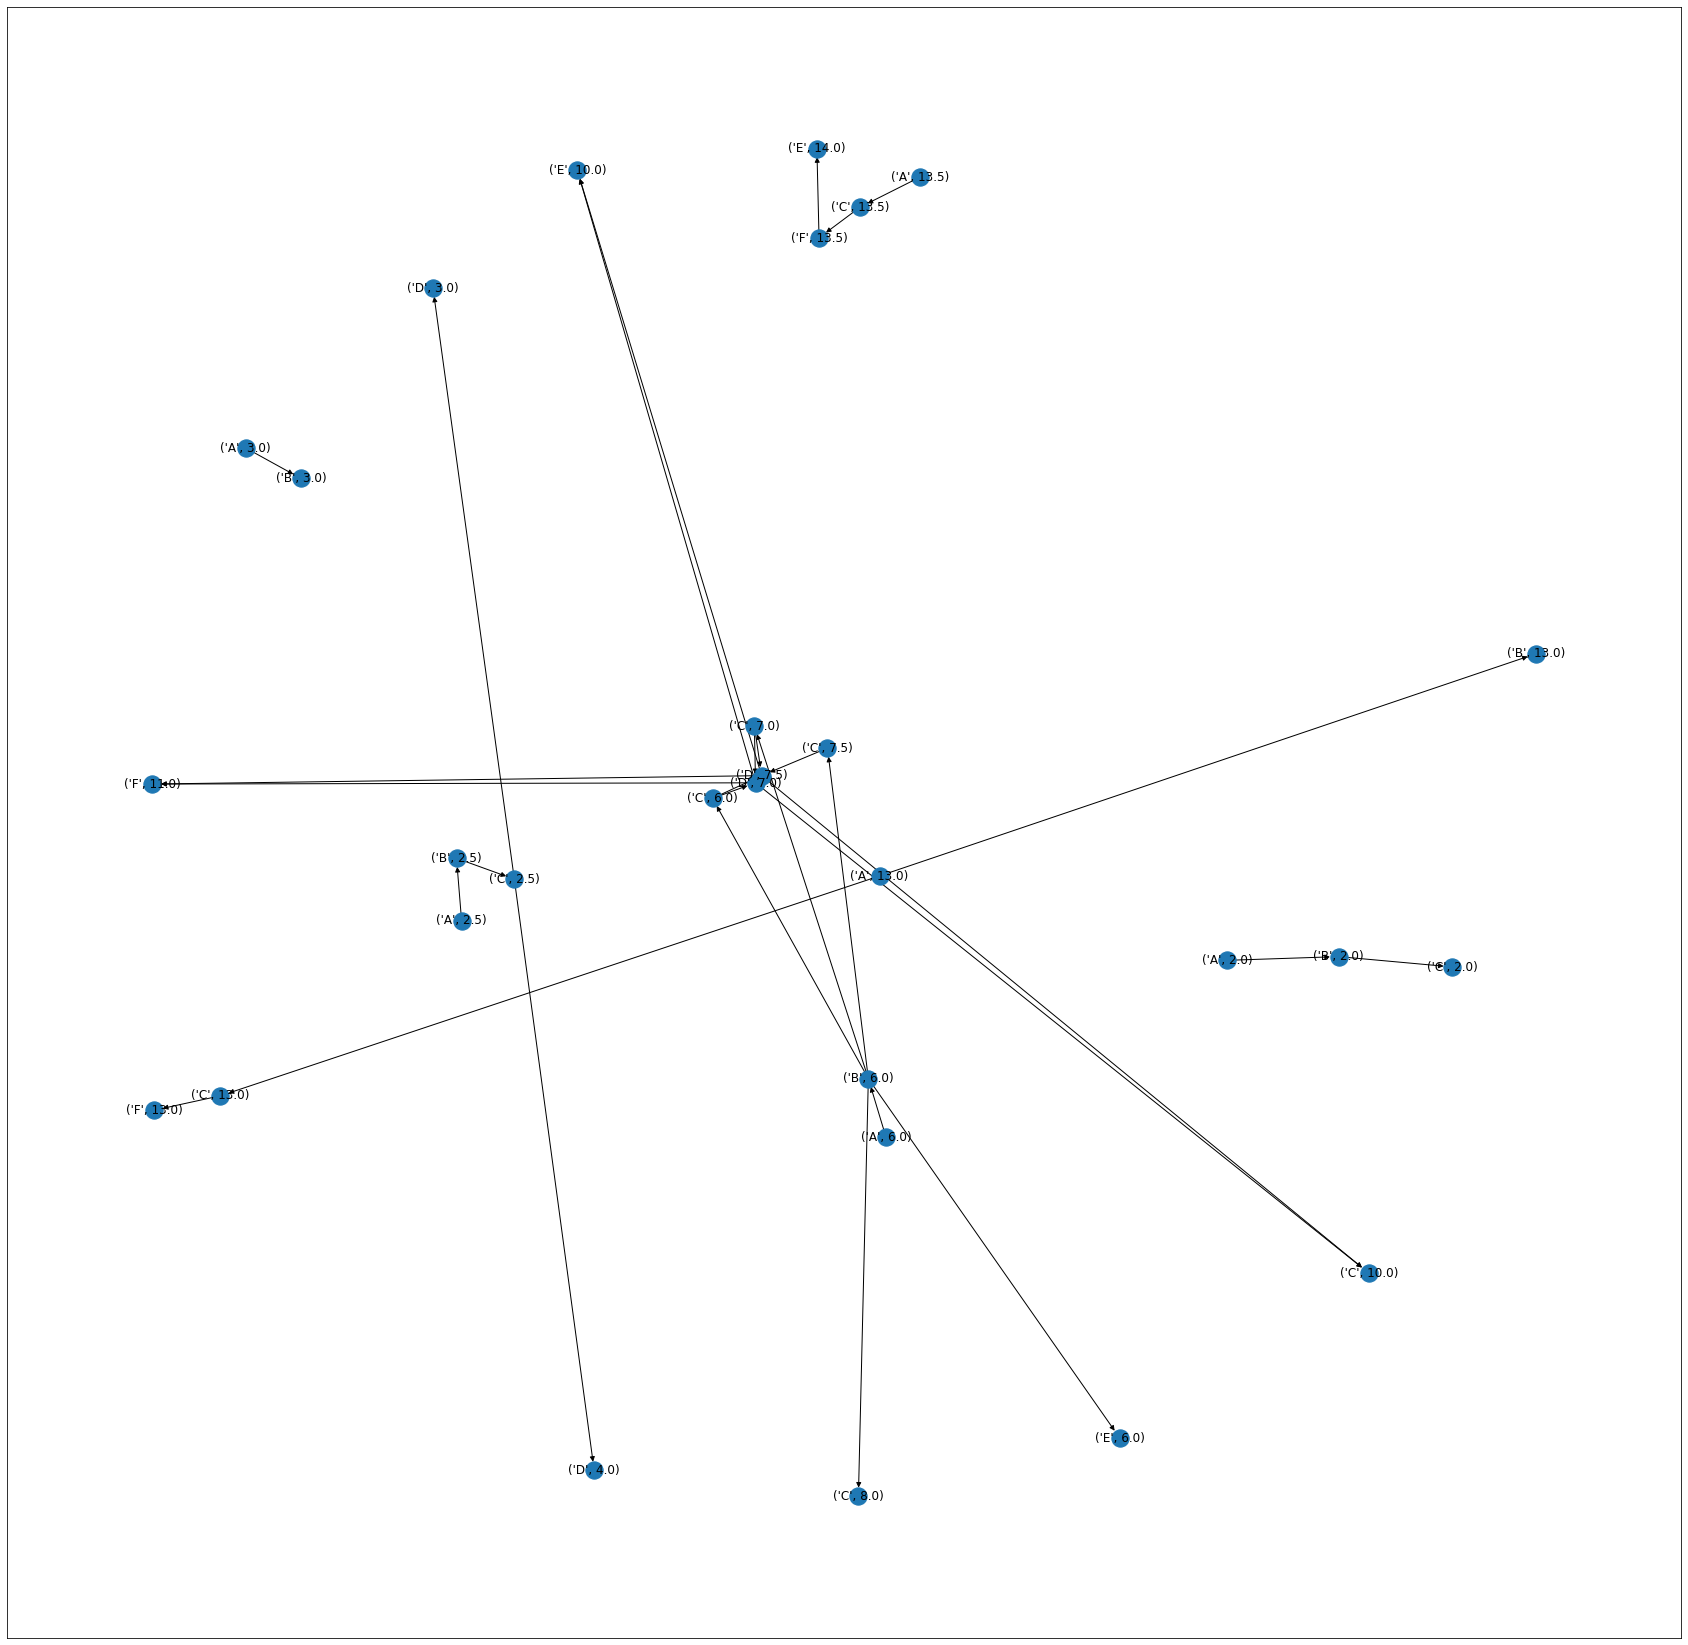

In [24]:
import networkx as nx
GD = G.graph
ren = dict()
for e in GD.nodes:
    ren[e] = (S.node_to_label[e[0]],e[1])
#print(ren)
GN =  nx.relabel_nodes(GD, ren, copy=True)
fig, ax = plt.subplots(figsize=(30,30))
nx.draw_networkx(GN,arrows=True,width = 1,ax = ax)

In [26]:
cc = nx.connected_components(nx.to_undirected(GN))
sg = []
for e in cc:
    sg.append(GN.subgraph(list(e)))

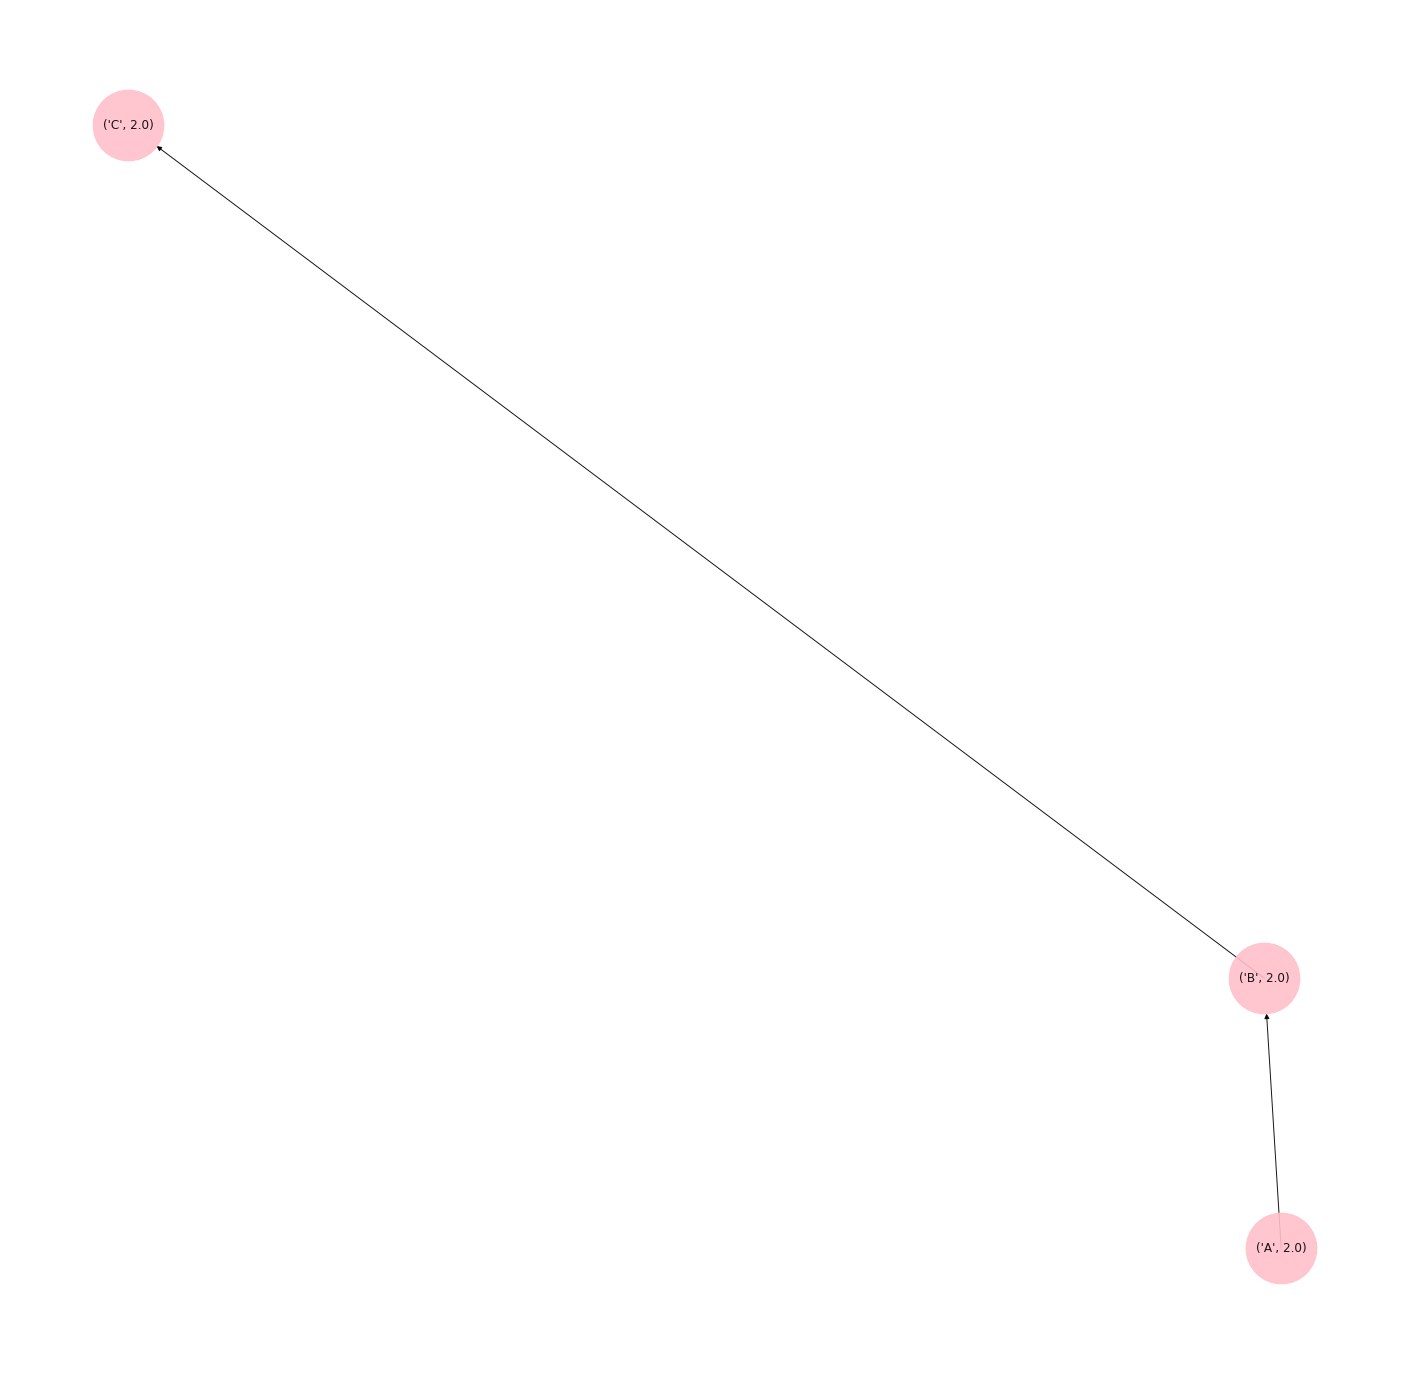

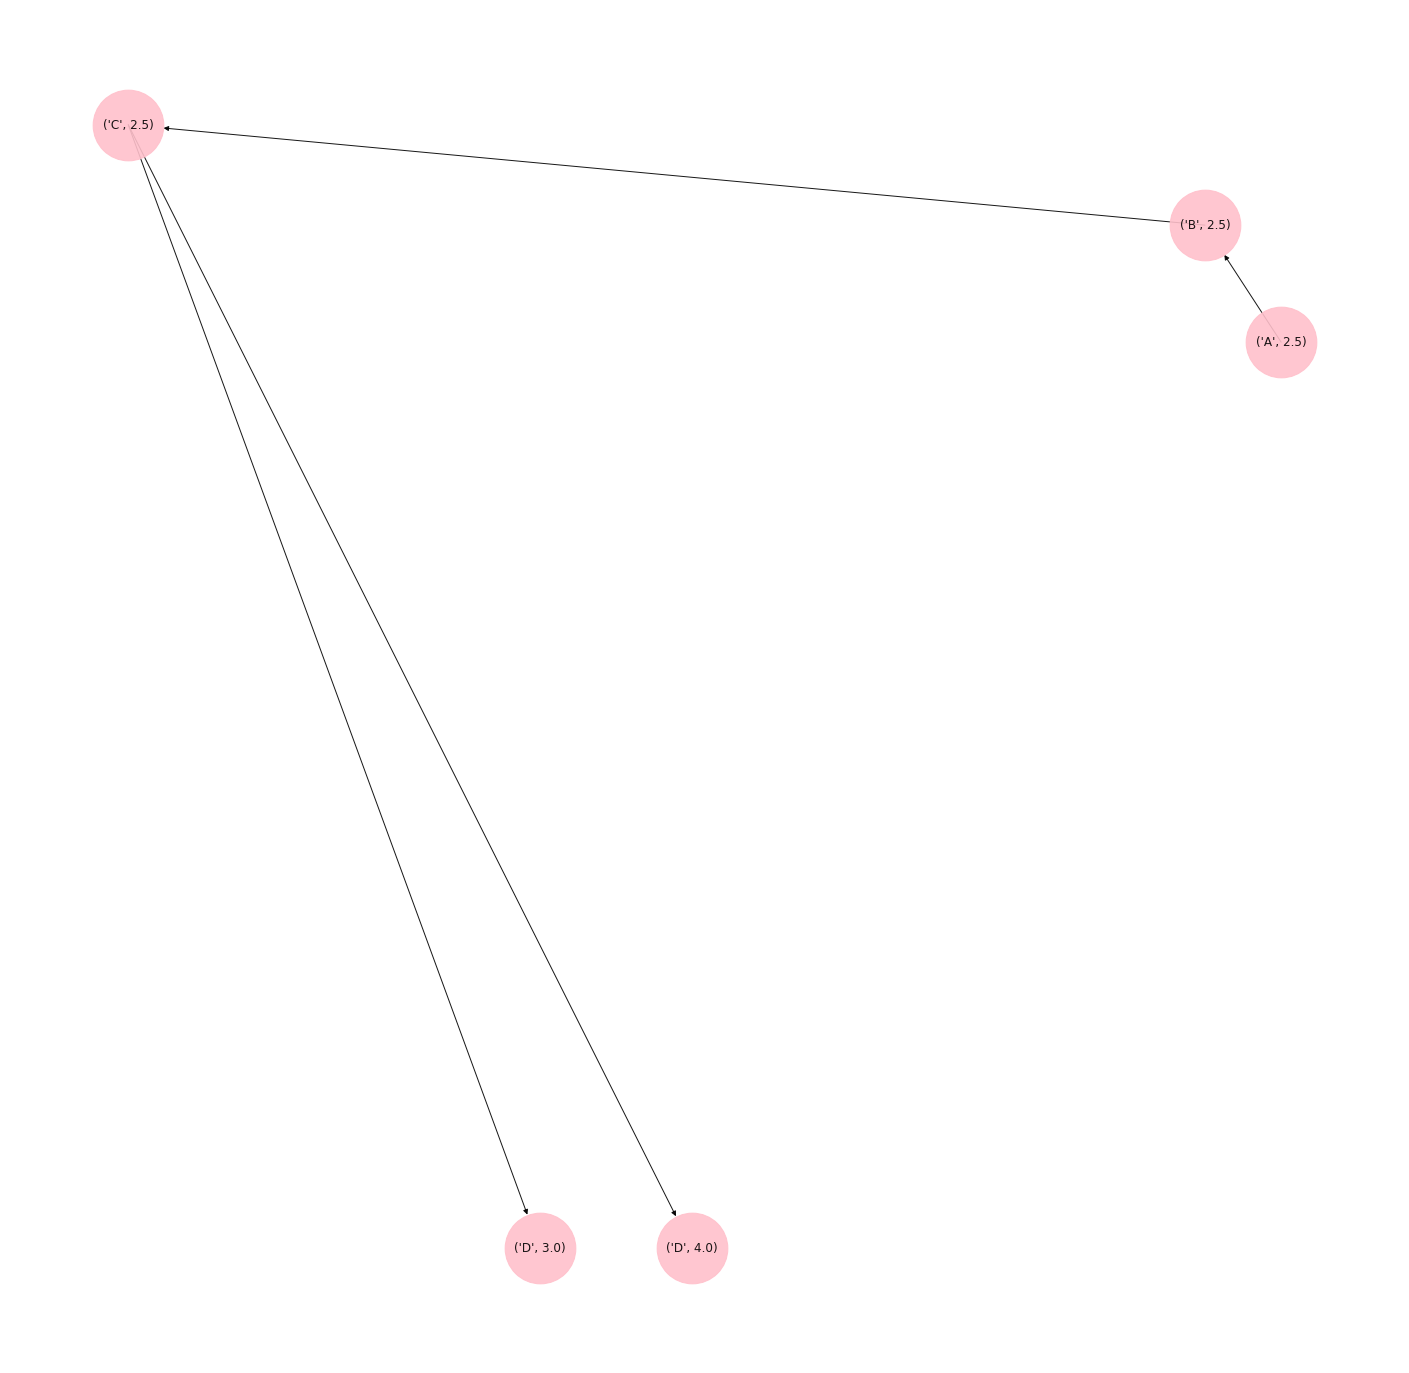

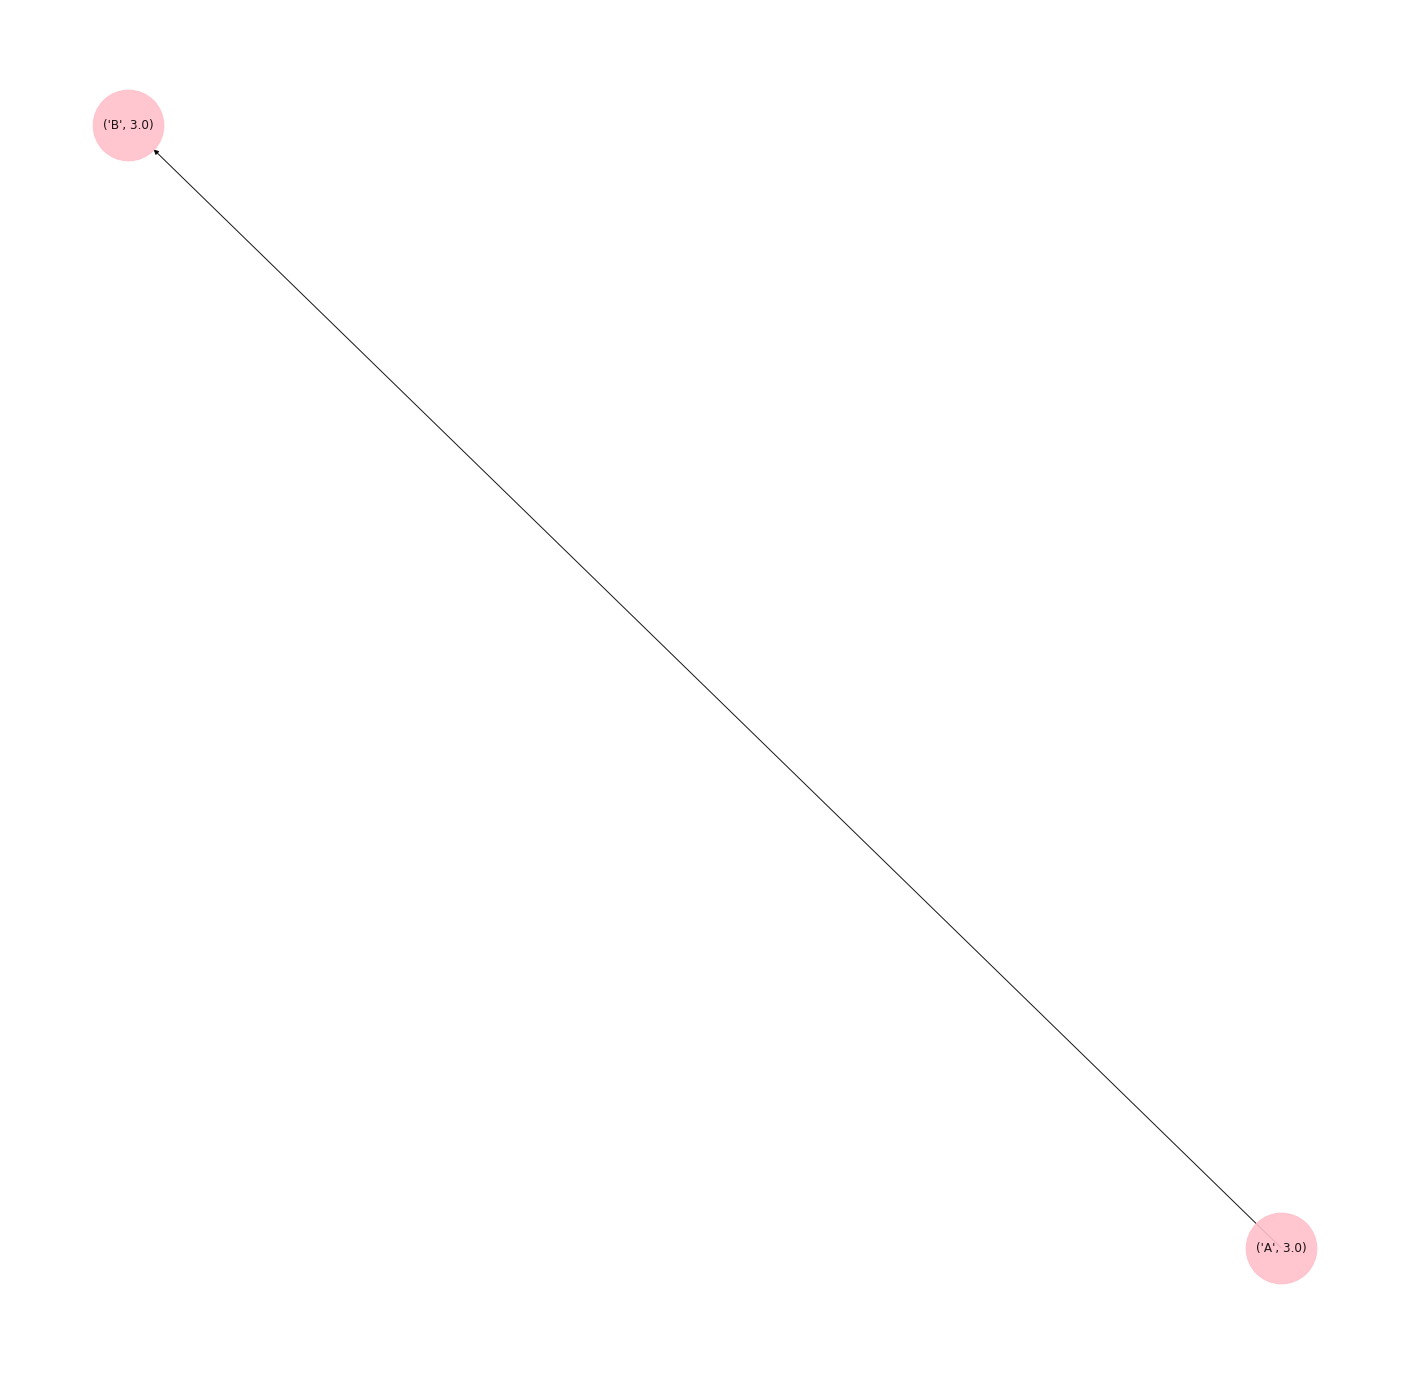

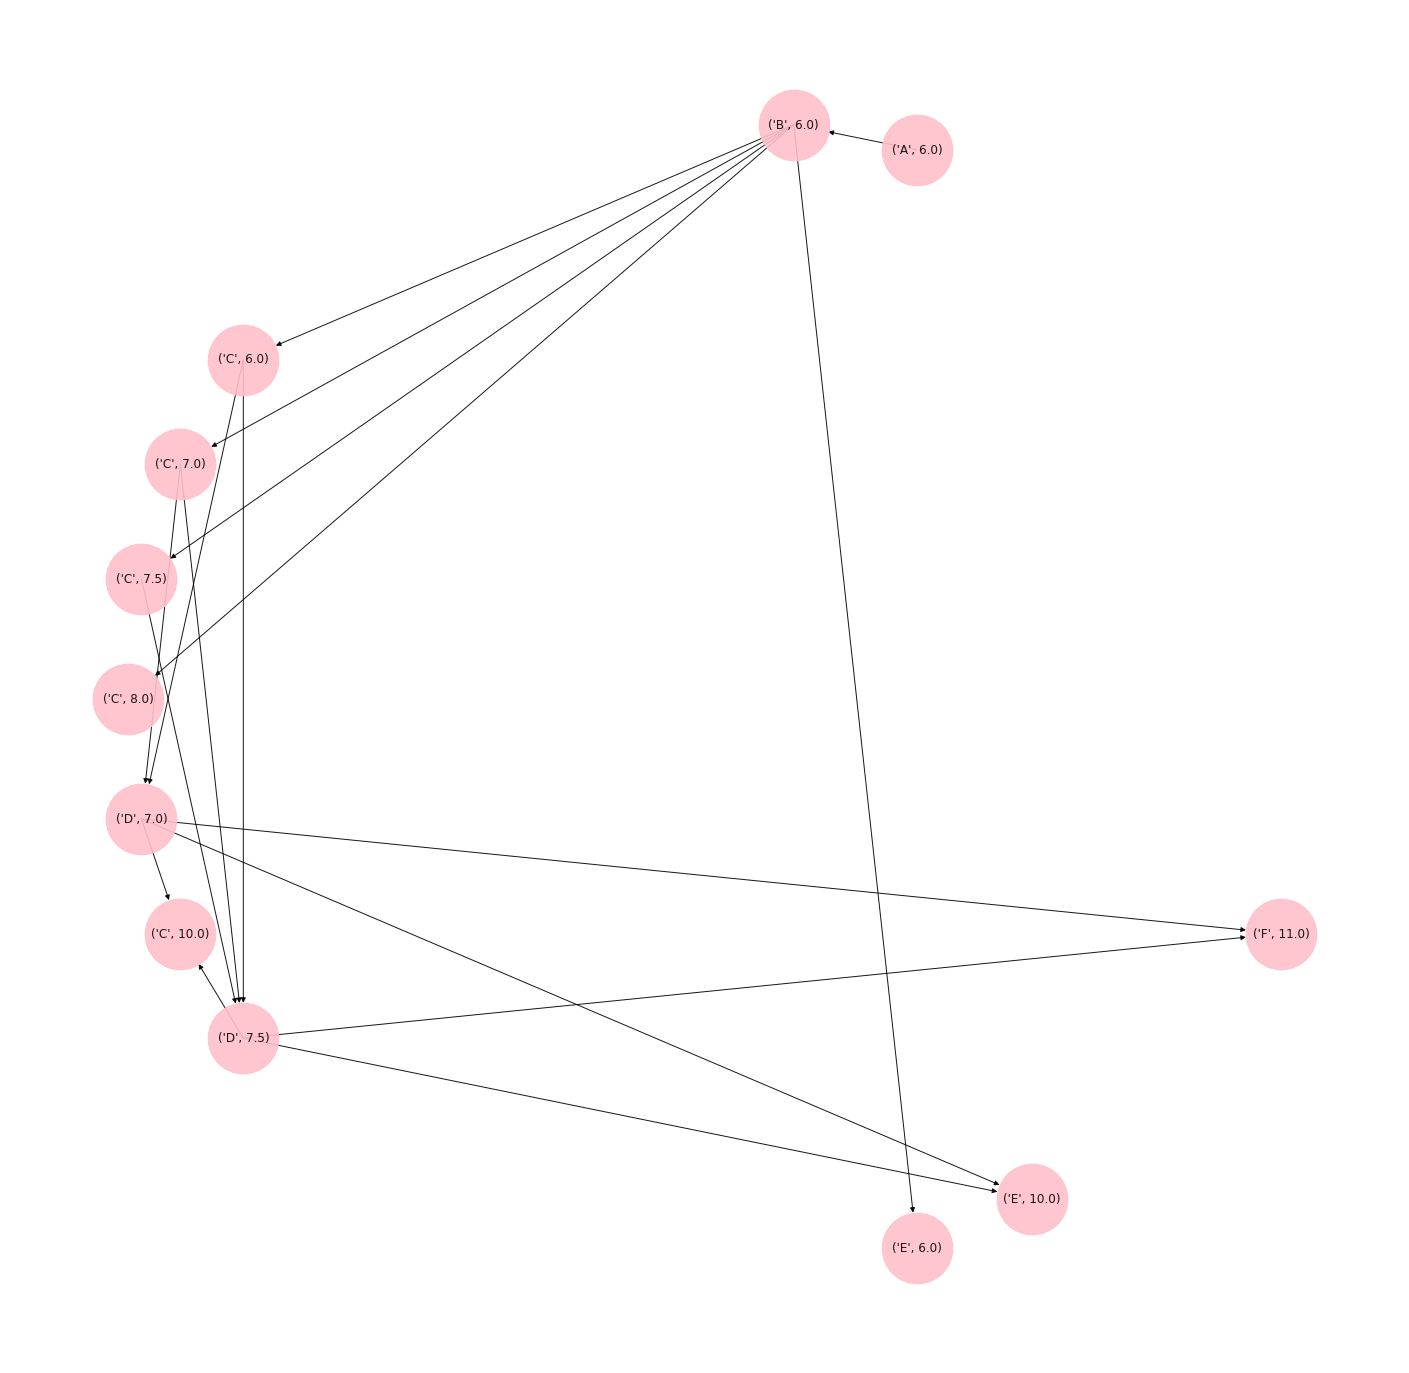

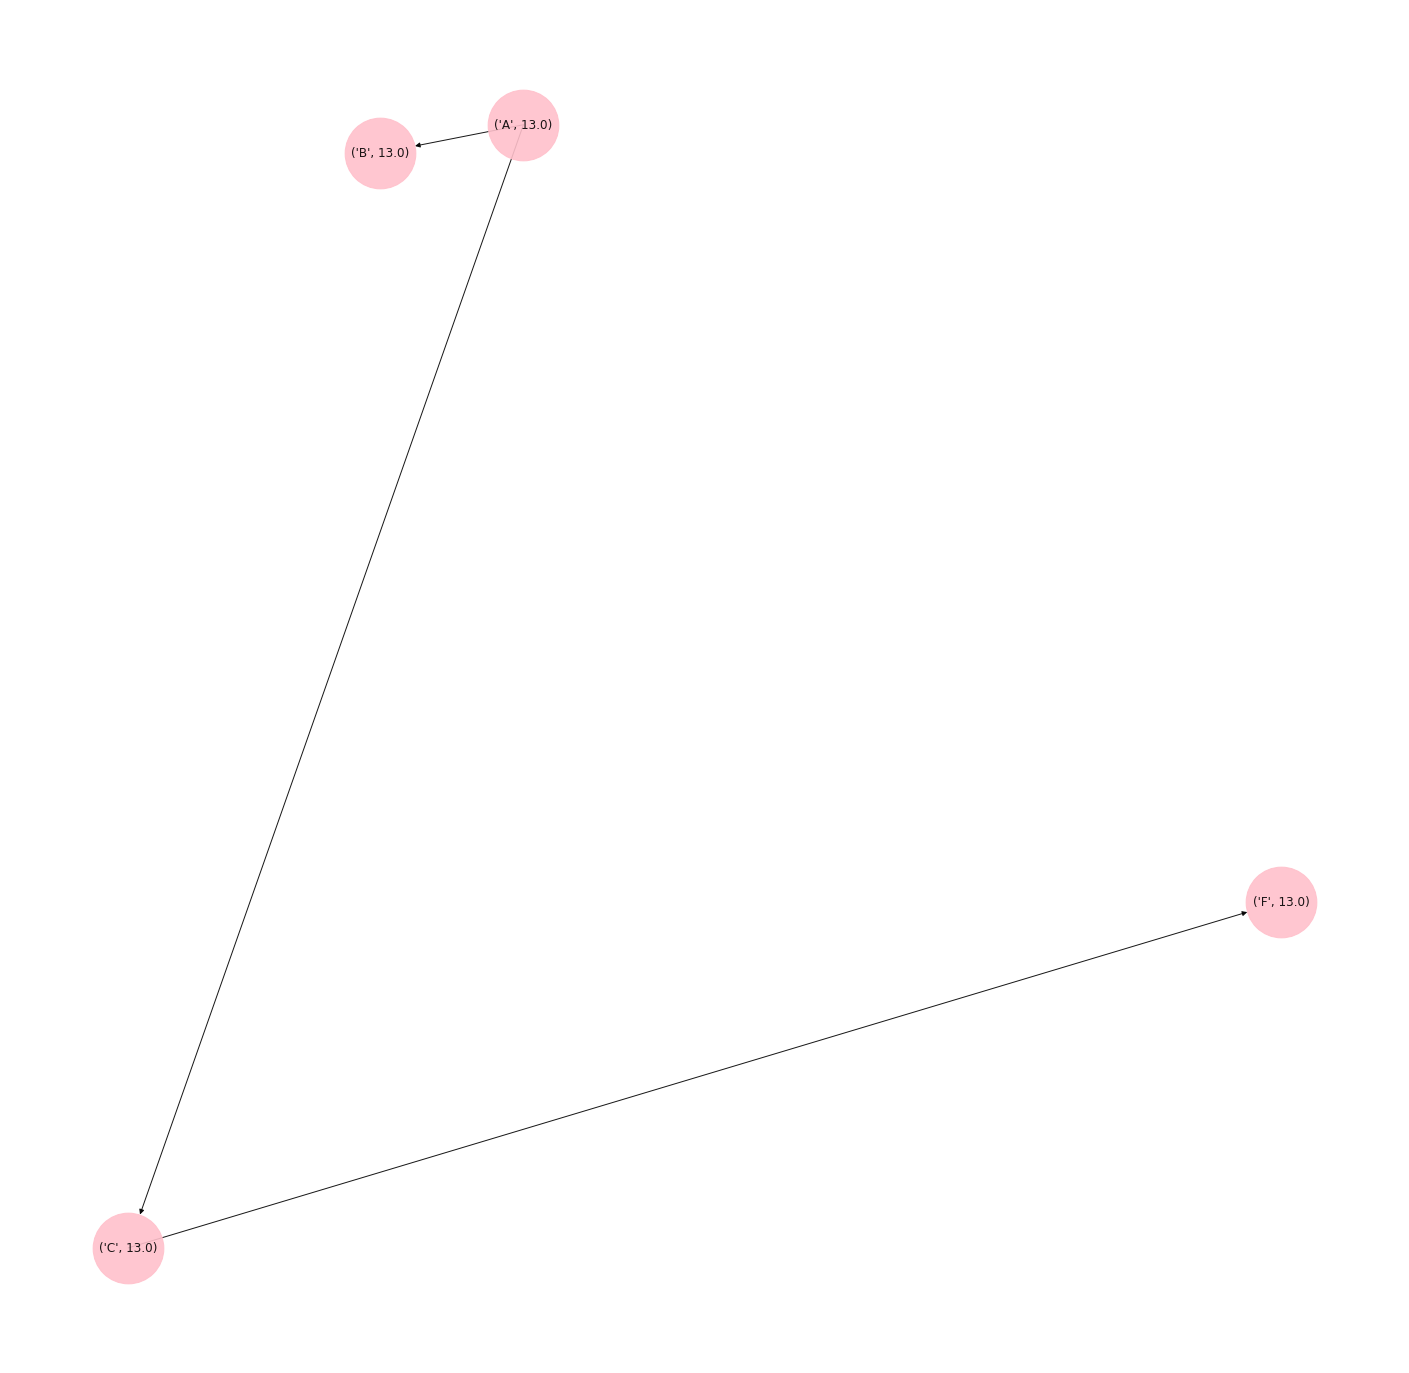

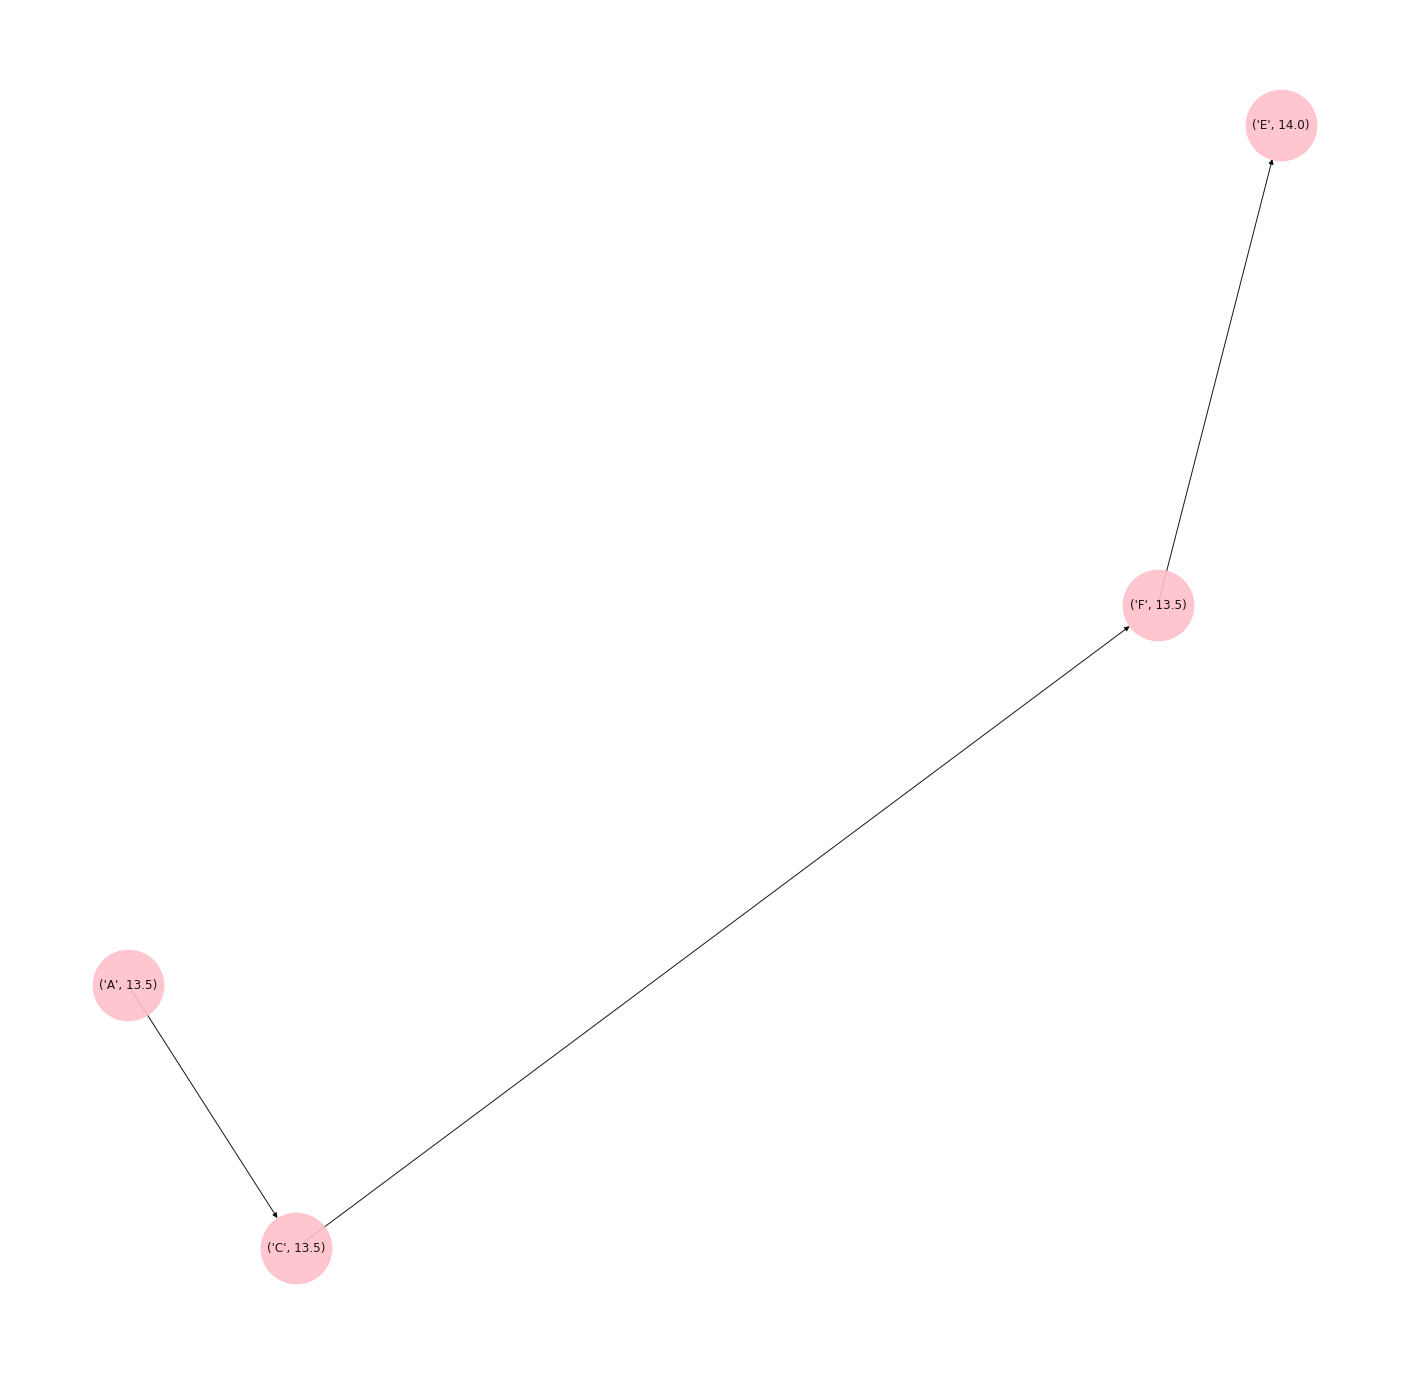

In [40]:
for i in range(0,len(sg)):
    fig, ax = plt.subplots(figsize=(25,25))
    pos = nx.circular_layout(GN)
    nx.draw(
    sg[i], pos, edge_color='black',
    node_size=5000, node_color='pink', alpha=0.9, fontsize=100,  with_labels = True
    
)
    #edge_l = dict()
    #for e in GN.edges():
     #   edge_l[e] = GN[e[0]][e[1]]['interval']
    #nx.draw_networkx_edge_labels(
    #sg[i], pos,
    #edge_labels=edge_l,
    #font_color='red'
#)
    plt.savefig("stream_cc_con"+str(i)+".png" )

In [15]:
edge = bt.edges(nouveau)

In [16]:
before, after = bt.volume_instantenuous(nouveau, G, events, events_reverse, edge)
mx = bt.max_volume_superposition(GT)
print(mx)

2


In [17]:
sigma = bt.volume_metapaths_at_t(G, node, cur_best, mx)
f_edge = bt.dictionary_first_edge(G,  cur_best)
sigma_r = bt.optimal_with_resting_con(nouveau, node, f_edge, events, G, sigma, cur_best, unt)

In [20]:
sigma_r

{(0, 0.0): vol(1,0),
 (0, 2.0): vol(1,0),
 (0, 2.5): vol(1,0),
 (0, 3.0): vol(1,0),
 (0, 4.0): vol(1,0),
 (0, 6.0): vol(1,0),
 (0, 7.0): vol(1,0),
 (0, 7.5): vol(1,0),
 (0, 8.0): vol(1,0),
 (0, 9.0): vol(1,0),
 (0, 10.0): vol(1,0),
 (0, 11.0): vol(1,0),
 (0, 12.0): vol(1,0),
 (0, 13.0): vol(1,0),
 (0, 13.5): vol(1,0),
 (0, 14.0): vol(1,0),
 (0, 15.0): vol(1,0),
 (1, 0.0): vol(0,0),
 (1, 2.0): vol(1,0),
 (1, 2.5): vol(1,0),
 (1, 3.0): vol(1,0),
 (1, 4.0): vol(1,0),
 (1, 6.0): vol(1,0),
 (1, 7.0): vol(1,0),
 (1, 7.5): vol(1,0),
 (1, 8.0): vol(1,0),
 (1, 9.0): vol(1,0),
 (1, 10.0): vol(1,0),
 (1, 11.0): vol(1,0),
 (1, 12.0): vol(1,0),
 (1, 13.0): vol(1,0),
 (1, 13.5): vol(1,0),
 (1, 14.0): vol(1,0),
 (1, 15.0): vol(1,0),
 (2, 0.0): vol(0,0),
 (2, 2.0): vol(1,0),
 (2, 2.5): vol(1,0),
 (2, 3.0): vol(1,0),
 (2, 4.0): vol(1,0),
 (2, 6.0): vol(1,0),
 (2, 7.0): vol(2,0),
 (2, 7.5): vol(0.5,1),
 (2, 8.0): vol(0.5,1),
 (2, 9.0): vol(0.5,1),
 (2, 10.0): vol(0.125,2),
 (2, 11.0): vol(0.125,2),
 (2,

In [21]:
contri, prev_next = bt.contribution_each_latency_con(nouveau, lat_rev_triplet,events[0],events[len(events)-1], before, after)
latence_arrival = {v : { y: [x,z] for (x,y,z) in lat_triplet[v] }  for v in nouveau.nodes }
latence_depar = {v : { x : [y,z] for (x,y,z) in lat_triplet[v] }  for v in nouveau.nodes }

1 0 0 0 [[2.0, 2.0, 0], [2.5, 2.5, 0], [3.0, 3.0, 0], [6.0, 6.0, 0], [13.0, 13.0, 0], [13.5, 13.5, 0]]
2 1 0 0 [[2.0, 2.0, 0], [2.5, 2.5, 0], [3.0, 3.0, 0], [6.0, 6.0, 0], [13.0, 13.0, 0], [13.5, 13.5, 0]]
2 0 0 0 [[2.0, 2.0, 0], [2.5, 2.5, 0], [3.0, 3.0, 0], [6.0, 6.0, 0], [13.0, 13.0, 0], [13.5, 13.5, 0]]
3 2 0 0 [[2.0, 2.0, 0], [2.5, 2.5, 0], [3.0, 3.0, 0], [6.0, 6.0, 0], [13.0, 13.0, 0], [13.5, 13.5, 0]]
3 1 0 0 [[2.0, 2.0, 0], [2.5, 2.5, 0], [3.0, 3.0, 0], [6.0, 6.0, 0], [13.0, 13.0, 0], [13.5, 13.5, 0]]
3 0 0 0 [[2.0, 2.0, 0], [2.5, 2.5, 0], [3.0, 3.0, 0], [6.0, 6.0, 0], [13.0, 13.0, 0], [13.5, 13.5, 0]]
4 3 0 0 [[2.0, 2.0, 0], [2.5, 2.5, 0], [3.0, 3.0, 0], [6.0, 6.0, 0], [13.0, 13.0, 0], [13.5, 13.5, 0]]
4 2 0 0 [[2.0, 2.0, 0], [2.5, 2.5, 0], [3.0, 3.0, 0], [6.0, 6.0, 0], [13.0, 13.0, 0], [13.5, 13.5, 0]]
4 1 0 0 [[2.0, 2.0, 0], [2.5, 2.5, 0], [3.0, 3.0, 0], [6.0, 6.0, 0], [13.0, 13.0, 0], [13.5, 13.5, 0]]
4 0 0 0 [[2.0, 2.0, 0], [2.5, 2.5, 0], [3.0, 3.0, 0], [6.0, 6.0, 0], [13.

In [22]:
deltasvvt = bt.dictionary_svvt(G, node, latence_arrival, contri, prev_next, sigma_r,  latence_depar)

In [23]:
deltasvvt

{(0, 2.0): vol(0,0),
 (1, 2.0): vol(0,0),
 (0, 2.5): vol(0,0),
 (1, 2.5): vol(0,0),
 (0, 3.0): vol(0,0),
 (1, 3.0): vol(0,0),
 (0, 6.0): vol(0,0),
 (1, 6.0): vol(24.0,0),
 (0, 13.0): vol(0,0),
 (1, 13.0): vol(17.0,0),
 (2, 2.0): vol(0,0),
 (2, 2.5): vol(0,0),
 (2, 6.0): vol(24.5,0),
 (2, 7.0): vol(0,0),
 (2, 7.5): vol(0,0),
 (2, 8.0): vol(0,0),
 (3, 7.0): vol(28.0,0),
 (2, 10.0): vol(0,0),
 (3, 7.5): vol(0,0),
 (2, 13.0): vol(0,0),
 (0, 13.5): vol(0,0),
 (2, 13.5): vol(0,0),
 (3, 3.0): vol(30.0,0),
 (3, 4.0): vol(0,0),
 (4, 6.0): vol(54.0,0),
 (4, 10.0): vol(0,0),
 (5, 13.5): vol(0,0),
 (4, 14.0): vol(7.5,0),
 (5, 11.0): vol(12.0,0),
 (5, 13.0): vol(0,0)}

In [24]:
contribution = bt.general_contribution_from_node(nouveau, G, node, GG, sigma_r, deltasvvt, events, events_reverse, pre, GT, unt)

TypeError: general_contribution_from_node() missing 1 required positional argument: 'preced'

In [25]:
contribution

NameError: name 'contribution' is not defined